In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels[:, k] == 1.
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    if W_ is not None:
        x1 = np.linspace(-.1, 1.1)
        x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
        plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

In [17]:
def plot_scatter_softmax(curr_W, curr_b, xy, labels):
    x1 = np.linspace(-0.1, 1.1)
    X, Y = np.meshgrid(x1,x1)
    Z1 = X * curr_W[0,0] + Y * curr_W[1,0] + curr_b[0]
    Z2 = X * curr_W[0,1] + Y * curr_W[1,1] + curr_b[1]
    Z = np.exp(Z2) / (np.exp(Z1) + np.exp(Z2))

    plt.figure(figsize=(5,5))
    cs = plt.contourf(X, Y, Z, np.linspace(0, 1, 11), cmap='coolwarm')
    plt.clabel(cs, colors='k')
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels[:, k] == 1
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color, edgecolors='k')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.show()

## Data 생성하기

In [18]:
np.random.seed(402)
xy = np.random.rand(30,2)
labels = np.zeros((len(xy),2))
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] > 0, 0] = 1
labels[-4./5. +  3./4. * xy[:,0] + 1.0 * xy[:,1] <= 0, 1] = 1
# Notice one-hot encoding
labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

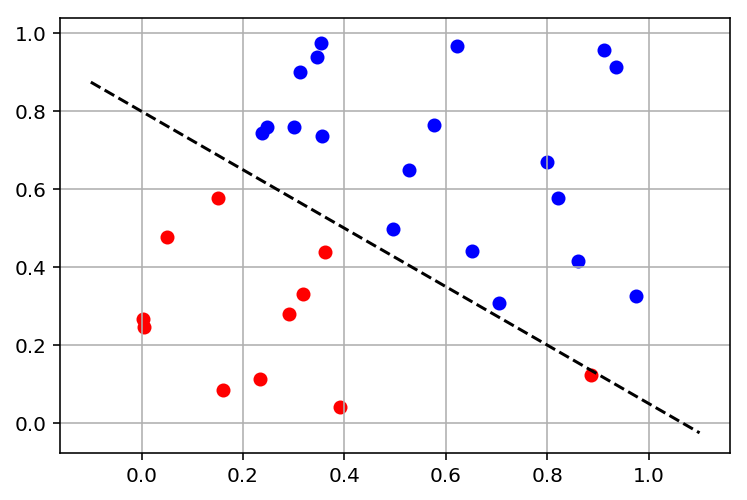

In [19]:
plot_scatter([-4/5., 3/4, 1], xy, labels)

## Binary Classification
$$
\min_{W,b} \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^2 -y_i^k \log(\hat{y_i^k})
$$
where $\hat{y_i^k} = softmax(x_i W + b)_k$

1. Forward Model : $\hat{y_i^k} = softmax(x_i W + b)_k$
1. Cross-Entropy : $\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^2 -y_i^k \log(\hat{y_i^k})$


### 01. Model에 맞는 feature 정리
For $i=1,2,\cdots,m$,
$$
\texttt{features}_i = [x_i, y_i]
$$

In [20]:
# TODO1
features = np.array([[xval, yval] for xval, yval in xy])
features[:10]

array([[0.05085764, 0.47670086],
       [0.31164216, 0.9016348 ],
       [0.49502649, 0.49823478],
       [0.91184471, 0.95672465],
       [0.34506596, 0.94023755],
       [0.2366796 , 0.74481348],
       [0.30043802, 0.7606868 ],
       [0.93589014, 0.91266408],
       [0.82007137, 0.57655843],
       [0.79928761, 0.67089507]])

### 02. Model TensorFlow로 정의하기

- TODO2 : `features`를 `feed`할 placeholder(`x`)를 정의
- TODO3 : Weight(`W`)와 bias(`b`)를 `Variable`로 초기값 1로 정의
- TODO4 : Model(`model`) 정의

$$
\hat{y_i^k} = softmax(x_i W + b)_k
$$

In [21]:
# TODO2
x = tf.placeholder(tf.float32, shape=(None, 2))

# TODO3
W = tf.Variable(tf.ones([2, 2]), dtype=tf.float32)
b = tf.Variable(tf.ones([2]), dtype=tf.float32)

# TODO4
model = tf.nn.softmax(tf.matmul(x, W) + b)

아래 코드를 돌려 에러가 나지 않으면 정답입니다.

In [56]:
# DO NOT MODIFY CODE BELOW
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

model_val = sess.run(model, feed_dict={x:features})
model_val.flatten()
np.testing.assert_array_almost_equal(model_val.flatten(), np.array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5]))
print("Test passed.")

Test passed.


### 03. Cross-Entropy 정의하기

- TODO5 : `labels`를 `feed`할 `placeholder`(`y`) 정의하기
- TODO6 : Corss-Entropy(`loss`) 정의하기 : `tf.

$$
\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^2 -y_i^k \log(\hat{y_i^k})
$$

In [57]:
# TODO 5
y = tf.placeholder(tf.float32, shape=(None, 2))
print(b.shape)
# TODO 6
loss = tf.reduce_mean(tf.reduce_sum(-y * tf.log(model), 1))

(2,)


아래 코드를 돌려 에러가 나지 않으면 정답입니다.

In [58]:
# DO NOT MODIFY CODE BELOW
loss_val = sess.run(loss, feed_dict={x:features, y:labels})
print(loss_val)
np.testing.assert_almost_equal(loss_val, 0.69314712)
print("Test passed.")

0.6931471
Test passed.


### 04. Hyper-Parameter 설정(TODO 7)
1. Optimizer : `AdamOptimizer`
1. `lerning rate` : `1.0`
1. `MaxEpoch` : `41`
1. Train Step

In [74]:
# TODO 7
lr = 1.0
# MaxEpochs= 41
MaxEpochs= 11
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

### 05. Gradient Descent

- TODO8 : batch 사용하지 않고 모든 features와 labels을 다 feed 해줍니다.

In [75]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: features, y: labels})
    for epoch in range(MaxEpochs):
        if epoch % 10 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y: labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)
        # TODO 8
        sess.run(train, feed_dict={x: features, y: labels})
    curr_b_gd, curr_W_gd = sess.run([b, W])

0 [1. 1.] [1. 1. 1. 1.] 0.6931471
10 [-0.7060083  2.7060082] [ 3.5851035 -1.585103   4.3737984 -2.3737984] 0.3050923


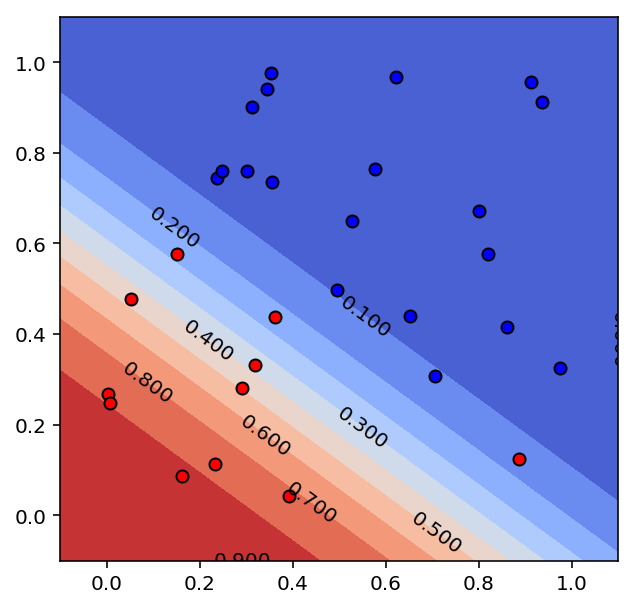

In [76]:
plot_scatter_softmax(curr_W_gd, curr_b_gd, xy, labels)

### 06. Stochastic Gradient Descent(SGD)
- TODO9 : shuffle training set
- TODO10 : batch 생성하기
- TODO11 : batch만 사용하여, train 하기

In [77]:
from helper import generate_batches

In [78]:
# TODO 9
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

In [79]:
batch_size = 5
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    out = sess.run([model, loss], feed_dict={x: shuffled_features, y: shuffled_labels})
    for epoch in range(MaxEpochs):
        if epoch % 10 == 0 :
            curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: shuffled_features, y: shuffled_labels})
            print(epoch, curr_b.flatten(), curr_W.flatten(), curr_loss)

        # TODO 10
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            # TODO 11
            sess.run(train, feed_dict={x: x_batch, y: y_batch})

    curr_b_sgd, curr_W_sgd = sess.run([b, W])

0 [1. 1.] [1. 1. 1. 1.] 0.6931471
10 [-4.196815   6.1968155] [ 5.784491  -3.7844894  8.161009  -6.1610084] 0.08594463


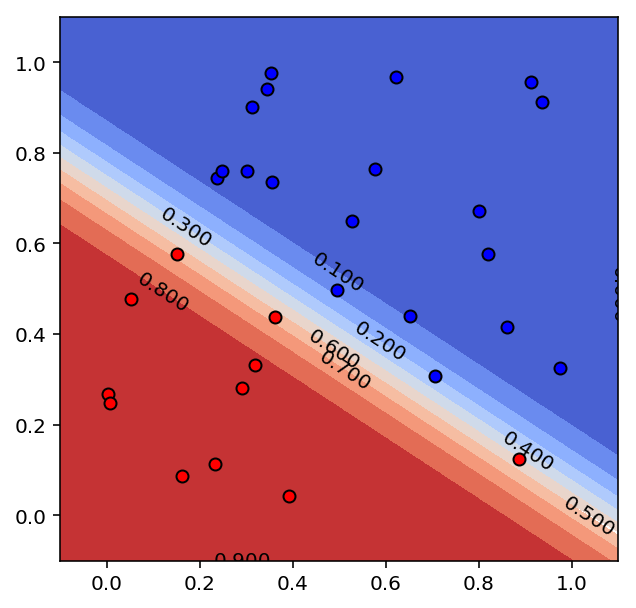

In [80]:
plot_scatter_softmax(curr_W_sgd, curr_b_sgd, xy, labels)